# Imports

In [1]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

# ==== Load Data ====

## - Dowload the csv 'https://github.com/Gwizdo51/analyse_sentiments_yelp/blob/main/restaurants_reims_reviews_analysed.csv'

# - Or use your own data by following this few steps :

## Be sure to rename the next columns before start the notebook :

## ['review']
## ['predicted_sentiment'] After get your positive and negative reviews from the model

In [2]:
df = pd.read_csv('== DATA ==')
df.head(2)

,id_business,review,date,#_stars,predicted_sentiment,prediction_probability
0,0,Nous avons passé une agréable soirée en amoure...,20/02/2017,5,POSITIVE,0.859995
1,0,Semi gastro plutôt tendance. J'ai pris une piè...,30/06/2016,3,NEGATIVE,0.736105


## Preprocesse the data with "Preprocessing.py" file

In [3]:
import Preprocessing as pre 
import re 

[nltk_data] Downloading package punkt to /home/sacha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sacha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sacha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Features Engineering

In [4]:
df_pos = df.loc[df['predicted_sentiment']=='POSITIVE']
df_neg = df.loc[df['predicted_sentiment']=='NEGATIVE']
df_pos.head()

,id_business,review,date,#_stars,predicted_sentiment,prediction_probability
0,0,Nous avons passé une agréable soirée en amoure...,20/02/2017,5,POSITIVE,0.859995
2,0,"Un resto que je conseille à mes amis, car ambi...",31/08/2013,5,POSITIVE,0.878346
5,0,Agréable moment Une cuisine goûteuse et origin...,29/01/2013,4,POSITIVE,0.926246
7,0,"Un chef cuisinant un menu le soir ""selon son h...",22/07/2012,5,POSITIVE,0.701768
8,0,tres bon restaurant. attention le prix a la ca...,14/08/2011,3,POSITIVE,0.821332


# Word Cloud

## Preprocess the positive reviews

In [5]:
df_pos = df_pos['review'].apply(pre.preprocess)
df_pos.head()

0    [passé, agréable, soirée, amoureux, chef, a, p...
2    [resto, conseille, amis, car, ambiance, sympat...
5    [agréable, moment, cuisine, goûteuse, original...
7    [chef, cuisinant, menu, soir, selon, humeur, d...
8    [tres, bon, restaurant, attention, prix, a, ca...
Name: review, dtype: object

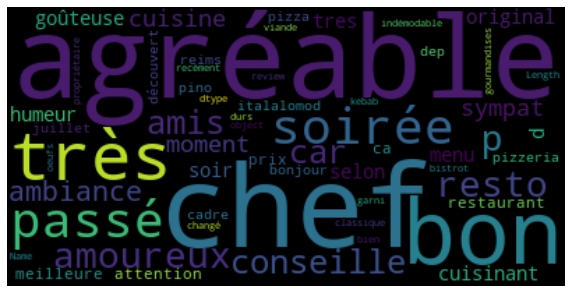

In [10]:
wordcloud = WordCloud(max_words=100, background_color="black").generate(str(df_pos))
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Preprocess negative reviews

In [6]:
df_neg = df_neg['review'].apply(pre.preprocess)
df_neg.head()

1     [semi, gastro, plut, tendance, pris, pièce, bo...
3     [restaurant, veut, jouer, grands, très, déçu, ...
4     [humeur, chef, humeur, client, restaurant, déc...
6     [déçue, rapport, quantité, prix, déçue, rappor...
16    [très, déçu, rendu, début, juillet, doit, dire...
Name: review, dtype: object

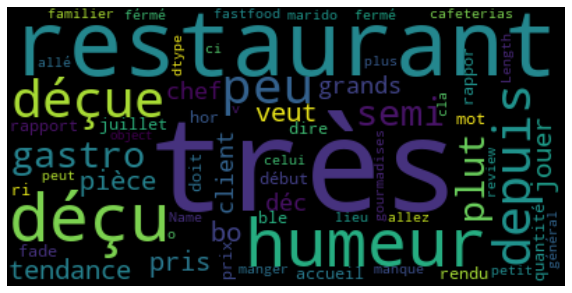

In [7]:
wordcloud = WordCloud(max_words=100, background_color="black").generate(str(df_neg))
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
